<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Machine Learning Python Code Snippets

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a set of **Machine Learning Python Code Snippets** to help folks build machine learning workflows in Python.

**YouTube Lecture**: check out my live code walk-throughs in my data science basics in Python playlist:

* [Data Science Basics in Python Playlist](https://youtube.com/playlist?list=PLG19vXLQHvSAufDFgZEFAYQEwMJXklnQV&si=z9BF45XAod6brI8Z)

These walkthrough support of my courses,

* [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI)

* [Data Analytics and Geostatistics Course](https://youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&si=XobEAdz3ntDdp870)

on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation

I taught a high school hackathon with great students from all over Texas and beyond and I felt that they could use some additional resources in the form of a **code snippets** to help them over the hurdles of completing their first data science workflow in Python. 

Remember the definition of a code snippet is,

* a small, reusable section of code that programmers can quickly insert into a larger codebase

My goal is to,

* **provide a set of minimum, simple code snippets** to accomplish basic data science modeling build steps

* **avoid fancy additions**, like automatic diagnostics and plotting that are specific to the problem setting that will break with new data

Therefore, improvements and additions to provide diagnostic outputs and plots are highly recommended.

#### Structure

```{admonition} This is not a workflow!
:class: remove-from-content-only

These are alphabetically ordered code snippets and not a complete workflow. Please do not attempt to run this chapter in sequence. 
```

In order to run the snippets we need to first,

1. Import some python packages

2. Declare a couple of convenience functions

3. Load some data to demonstrate the code snippets

After we load the data the remaining codes with be in alphabetical and not any logical workflow order for ease of search and retrieval. 

#### Import Required Packages

We need some standard packages. These should have been installed with Anaconda 3.

In [119]:
import numpy as np                                            # arrays
import pandas as pd                                           # dataframes
import matplotlib.pyplot as plt                               # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator) # control of axes ticks
from statsmodels.stats.outliers_influence import variance_inflation_factor # variance inflation factor
from sklearn.impute import SimpleImputer                      # basic imputation method
from sklearn.experimental import enable_iterative_imputer     # required for MICE imputation
from sklearn.impute import IterativeImputer                   # MICE imputation
from sklearn.impute import KNNImputer                         # k-nearest neighbour imputation method
from sklearn.model_selection import train_test_split          # train and test split
from sklearn.linear_model import LinearRegression             # linear regression
from sklearn.preprocessing import StandardScaler              # standardize the features
from sklearn.preprocessing import MinMaxScaler                # min and max normalization
from sklearn.preprocessing import KBinsDiscretizer            # k-bin discretizer
from sklearn.neighbors import KNeighborsRegressor             # K-nearest neighbours
from sklearn.feature_selection import mutual_info_regression  # mutual information
from sklearn.metrics import mean_absolute_error               # mean absolute error
from sklearn.metrics import normalized_mutual_info_score      # normalized mutual information
from sklearn import tree                                      # decision tree
from sklearn.tree import plot_tree                            # plot the decision tree
from sklearn import metrics                                   # measures to check our models
plt.rc('axes', axisbelow=True)                                # set axes and grids in the background for all plots
import math                                                  
seed = 13
cmap = plt.cm.inferno                                         # a good colormap for folks with color perception issues
utcolor = '#BF5700'                                           # burnt orange, Hook'em!

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Here's the functions to improve code readability.

In [122]:
def add_grid():                                               # add grid lines
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Load a Couple Datasets

We load a couple of datasets,

1. df - an exhaustive data table as a pandas DataFrame

2. df_missing an data table with some missing data as a pandas DataFrame

3. ndarray_2D - a 2D array map as a NumPy ndarray

To demonstrat the methods below.

In [125]:
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv") # load the data from my github repo
df_missing = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_missing.csv") 
ndarray_2D = np.loadtxt("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v13_truth_AI.csv", 
                     delimiter=",")
np.random.seed(seed=seed+7)                                     # set random number seed for reproducibility
df['Prod'] = df['Prod'] + np.random.normal(loc=0.0,scale=600.0,size=len(df)) # add noise to demonstrate overfit and hyperparameter tuning

#### Complete Some Basic Operations

Here I complete some basic operations to ensure that the alphabetically sorted code snippets below have the inputs to avoid errors.

In [128]:
X = df.iloc[:,1:-1]; y = df.iloc[:,[-1]]                      # separate predictor and response, assumes response is the last features
X_missing = df_missing.iloc[:,1:-1]; y_missing = df_missing.iloc[:,[-1]] # separate predictor and response, assumes response is the last features
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.2, random_state=seed)             # train and test split
linear_model = LinearRegression().fit(X_train,y_train)        # instantiate and train linear regression model, no hyperparmeters
y_hat_train = linear_model.predict(X_train)                   # predict over the training data
y_hat_test = linear_model.predict(X_test)                     # predict over the training data
linear_1pred_model = LinearRegression().fit(X_train[['Por']].values,y_train) # linear regression model with only 1 predictor feature
linear_2pred_model = LinearRegression().fit(X_train[['Por','Brittle']].values,y_train) # linear regression model with only 1 predictor feature

OK, now we are ready to walk thorugh our alphabetically ordered code snippets.

#### Correlation (Pearson product momment)

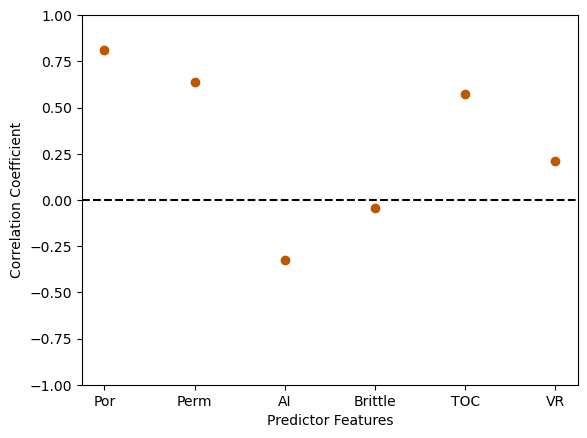

In [131]:
correlations = df.corr().loc[X.columns, y.columns[0]]         # calculate correlation matrix and extract the pred. rows for the response column
correlations.plot(color=utcolor,style='o'); plt.xlabel('Predictor Features'); plt.ylabel('Correlation Coefficient'); plt.ylim(-1,1); 
plt.axhline(y=0.0, color='black', linestyle='--'); plt.show()

#### Correlation (Spearman rank)

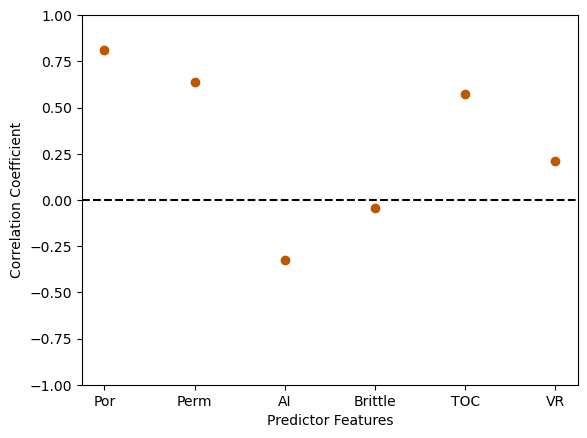

In [134]:
correlations = df.corr().loc[X.columns, y.columns[0]]         # calculate Spearman correlation with same method as Pearson above
correlations.plot(color=utcolor,style='o'); plt.xlabel('Predictor Features'); plt.ylabel('Correlation Coefficient'); plt.ylim(-1,1); 
plt.axhline(y=0.0, color='black', linestyle='--'); plt.show()

#### Cross Validation Plot (training and testing)

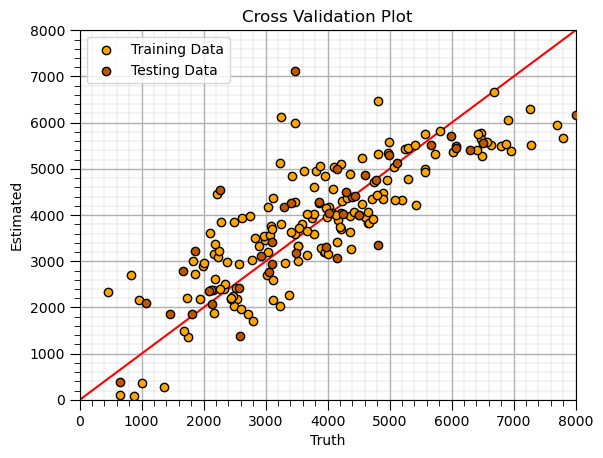

In [137]:
plt.scatter(y_train,y_hat_train,color='orange',edgecolor='black',label=r'Training Data',zorder=10) # scatter plot
plt.scatter(y_test,y_hat_test,color=utcolor,edgecolor='black',label=r'Testing Data',zorder=10)
plt.ylabel('Estimated'); plt.xlabel('Truth'); plt.title('Cross Validation Plot'); plt.legend(loc = 'upper left')
plt.plot([0,8000],[0,8000],color='red'); plt.xlim(0,8000,); plt.ylim(0,8000); add_grid(); 

#### Cross Validation Plot (testing)

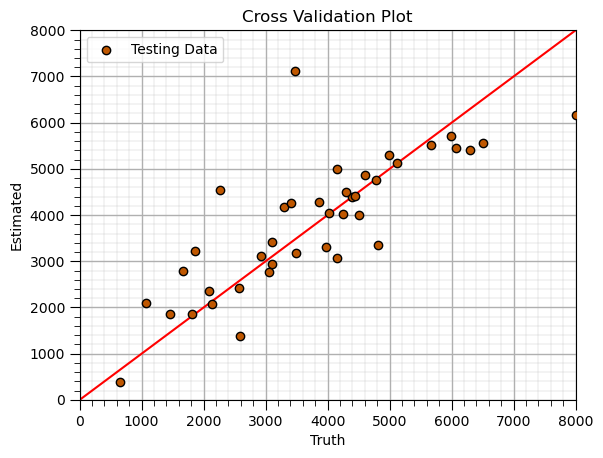

In [139]:
plt.scatter(y_test,y_hat_test,color=utcolor,edgecolor='black',label=r'Testing Data',zorder=10) # scatter plot
plt.ylabel('Estimated'); plt.xlabel('Truth'); plt.title('Cross Validation Plot'); plt.legend(loc = 'upper left')
plt.plot([0,8000],[0,8000],color='red'); plt.xlim(0,8000,); plt.ylim(0,8000); add_grid()

#### Cross Validation Plot (training)

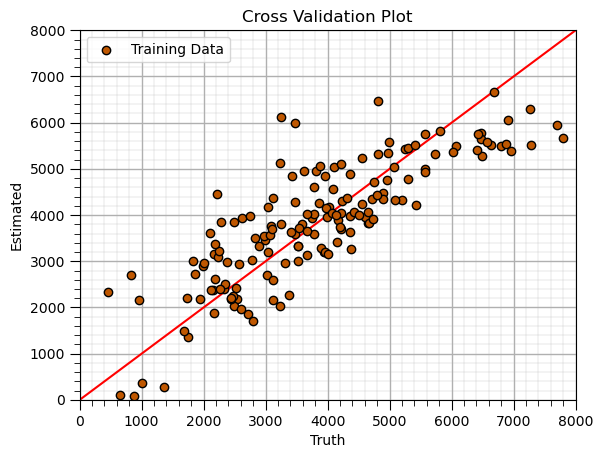

In [143]:
plt.scatter(y_train,y_hat_train,color=utcolor,edgecolor='black',label=r'Training Data',zorder=10) # scatter plot
plt.ylabel('Estimated'); plt.xlabel('Truth'); plt.title('Cross Validation Plot'); plt.legend(loc = 'upper left')
plt.plot([0,8000],[0,8000],color='red'); plt.xlim(0,8000,); plt.ylim(0,8000); add_grid(); 

#### DataFrame (add noise to a feature)

I do this to experiment and make educational content, e.g., add noise to the response feature to demonstrate overfit.

In [145]:
df_temp = df.copy(deep=True)                                  # make a deep copy of the DataFrame
np.random.seed(seed=seed)                                     # set random seed for repeatability
df_temp['Prod'] = df_temp['Prod'] + np.random.normal(loc=0.0,scale=100.0,size=len(df_temp)) # add a feature of ones called 'Ones'
df_temp.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,2154.457620
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3199.991714
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2742.009861
3,4,17.67,6.75,2.63,39.81,1.08,1.88,3927.738944
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2343.080242


#### DataFrame (make new)

In [149]:
df_new = pd.DataFrame({'Ones':np.ones((100)),'Zeros':np.zeros((100))}) # make new DataFrame
df_new.head()

,Ones,Zeros
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


#### DataFrame (add a new feature/column)

In [152]:
df_temp = df.copy(deep=True)                                  # make a deep copy of the DataFrame
df_temp['Ones'] = np.ones((len(df_temp)))                     # add a feature of ones called 'Ones'
df_temp.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod,Ones
0,1,12.08,2.92,2.80,81.40,1.16,2.31,2225.696687,1.0
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3124.615076,1.0
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2746.460169,1.0
3,4,17.67,6.75,2.63,39.81,1.08,1.88,3882.557711,1.0
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2208.570072,1.0


#### DataFrame (preview)

Display the first 'n' rows of the DataFrame

In [155]:
df.head(n=13)                                                 # display the first n rows of the DataFrame

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,2225.696687
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3124.615076
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2746.460169
3,4,17.67,6.75,2.63,39.81,1.08,1.88,3882.557711
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2208.570072
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4353.192212
6,7,13.49,3.60,2.93,63.71,0.80,1.85,3516.494383
7,8,11.58,3.03,3.25,53.00,0.69,1.93,2083.845221
8,9,12.52,2.72,2.43,65.77,0.95,1.98,2775.906282
9,10,13.25,3.94,3.71,66.20,1.14,2.65,2966.741947


#### DataFrame (rename a feature/column)

In [158]:
df_temp = df.copy(deep=True)                                  # make a deep copy of the DataFrame
df_temp.rename(columns={'Por':'Porosity (%)'},inplace=True)   # rename 'Por' features as 'Porosity'
df_temp.head()

,Well,Porosity (%),Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,2225.696687
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3124.615076
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2746.460169
3,4,17.67,6.75,2.63,39.81,1.08,1.88,3882.557711
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2208.570072


#### DataFrame (remove features/columns)

In [161]:
df_temp = df.copy(deep=True)                                  # make a deep copy of the DataFrame
df_temp.drop(columns=['Well','Por','AI'],inplace=True)        # remove features 'Well','Por' and 'AI'
df_temp.head()

,Perm,Brittle,TOC,VR,Prod
0,2.92,81.40,1.16,2.31,2225.696687
1,3.53,46.17,0.89,1.88,3124.615076
2,2.59,72.80,0.89,2.72,2746.460169
3,6.75,39.81,1.08,1.88,3882.557711
4,4.57,10.94,1.51,1.90,2208.570072


#### DataFrame (remove samples/rows)

In [164]:
df_temp = df.copy(deep=True)                                  # make a deep copy of the DataFrame
df_temp = df_temp.drop(df.index[[0, 2, 4]])                   # removes samples 0, 2 and 4
df_temp.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3124.615076
3,4,17.67,6.75,2.63,39.81,1.08,1.88,3882.557711
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4353.192212
6,7,13.49,3.60,2.93,63.71,0.80,1.85,3516.494383
7,8,11.58,3.03,3.25,53.00,0.69,1.93,2083.845221


#### DataFrame (remove samples/rows by condition)

In [167]:
df_temp = df.copy(deep=True)                                  # make a deep copy of the DataFrame
df_temp = df_temp[df_temp['Por'] > 13.0]                      # remove all samples with 'Por' <= 13%
df_temp.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2746.460169
3,4,17.67,6.75,2.63,39.81,1.08,1.88,3882.557711
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2208.570072
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4353.192212
6,7,13.49,3.60,2.93,63.71,0.80,1.85,3516.494383


#### Decision Tree (prediction at testing data)

Apply our model to predict at withheld testing data.

In [170]:
leaf_node = 5                                                 # decision tree model hyperparameters
tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=leaf_node).fit(X_train,y_train) # instantiate the prediction model
y_test_temp = y_test.copy(deep=True)
y_test_temp['Estimated Prod'] = tree_model.predict(X_test)    # predict over the training data
y_test_temp.head()

,Prod,Estimated Prod
179,656.507448,2218.196237
155,3110.245382,2218.196237
23,2581.359826,2218.196237
159,6498.151446,6482.917835
96,4148.822923,4297.451039


#### Decision Tree (prediction at training data)

Apply our model to predict at the retained training data.

In [173]:
leaf_node = 5                                                 # decision tree model hyperparameters
tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=leaf_node).fit(X_train,y_train) # instantiate the prediction model
y_train_temp = y_train.copy(deep=True)
y_train_temp['Estimated Prod'] = tree_model.predict(X_train)  # predict over the training data
y_train_temp.head()

,Prod,Estimated Prod
125,3750.106623,4297.451039
68,4644.717576,4297.451039
69,1991.991593,2218.196237
108,6688.360827,6482.917835
131,5076.638358,4297.451039


#### Decision Tree (train)

Train model parameters on training data with specified model hyperparameters

* let's look at the trained model parameters, by visualizing the trained decision tree.

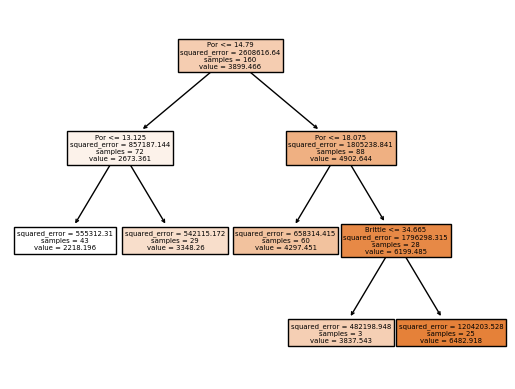

In [176]:
leaf_node = 5                                                 # decision tree model hyperparameters
tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=leaf_node).fit(X_train,y_train) # instantiate the prediction model
plot_tree(tree_model, feature_names=X_train.columns, filled=True); plt.show() # plot the decision tree

#### Decision Tree (retrain tuned model)

Apply tuned hyperparameters and retrain the model with all the data.

* this is the model that we will use for future predictions, real-world use

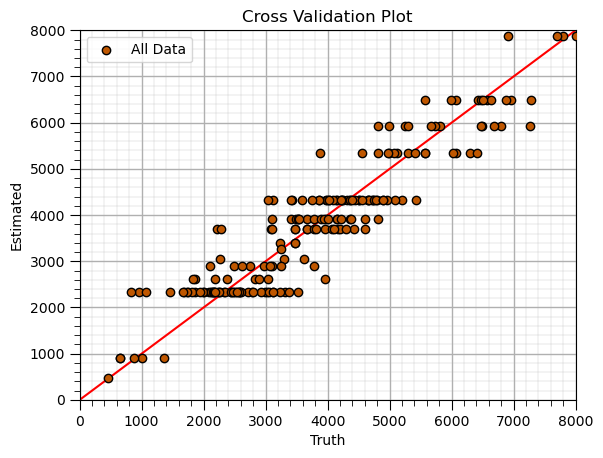

In [179]:
tuned_leaf_node = 15;                                         # decision tree model hyperparameters
tuned_tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=tuned_leaf_node).fit(X,y) # instantiate the prediction model
y_hat = tuned_tree_model.predict(X)                           # predict over the testing cases
plt.scatter(y,y_hat,color=utcolor,edgecolor='black',label=r'All Data',zorder=10) # scatter plot
plt.ylabel('Estimated'); plt.xlabel('Truth'); plt.title('Cross Validation Plot'); plt.legend(loc = 'upper left')
plt.plot([0,8000],[0,8000],color='red'); plt.xlim(0,8000,); plt.ylim(0,8000) 
add_grid(); 

#### Decision Tree (tune/prune)

Train model parameters on training data with a range of model hyperparameters, select the model hyperparameters with minimum error over the withheld testing data

This requires the following steps,

Loop over the hyperparameter(s) values,

1. train the model with the retained training data

2. predict at the withheld testing data

3. calculate the testing error

Select the hyperparameter that minimized the testing error

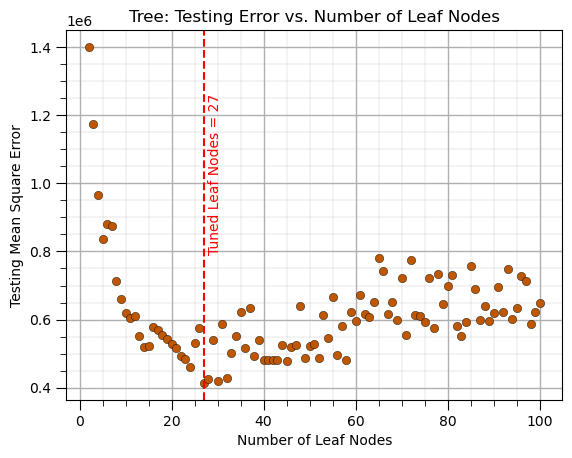

In [185]:
leaf_node = 2                                                 # set initial hyperparameter
MSE_tree_list = []; leaf_node_list = []                       # make lists to store the results
while leaf_node <= 100:                                       # loop over the number of leaf nodes hyperparameter
    tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=leaf_node).fit(X_train,y_train) # instandiate and train the model
    y_hat_test = tree_model.predict(X_test)                   # predict over the testing cases
    MSE_tree = metrics.mean_squared_error(y_test,y_hat_test)  # calculate the MSE testing
    MSE_tree_list.append(MSE_tree)                            # add to the list of MSE
    leaf_node_list.append(leaf_node)                          # append leaf node to an array for plotting
    leaf_node = leaf_node + 1

tuned_leaf_nodes = leaf_node_list[np.argmin(MSE_tree_list)]           # get the k that minimizes the testing MSE

plt.subplot(111)
plt.scatter(leaf_node_list,MSE_tree_list,s=None, c=utcolor, alpha=1.0, linewidths=0.3, edgecolors="black") # plot testing MSE vs. hyperparameter
plt.axvline(x=tuned_leaf_nodes, color='red', linestyle='--') 
plt.annotate('Tuned Leaf Nodes = ' + str(tuned_leaf_nodes),[tuned_leaf_nodes+1,0.8e6],color='red',rotation= 90)
plt.title('Tree: Testing Error vs. Number of Leaf Nodes'); plt.xlabel('Number of Leaf Nodes'); plt.ylabel('Testing Mean Square Error')
add_grid()

#### Features Extraction (by name)

Build a new DataFrame with only the selected predictor feature and the response feature

1. specify the selected predictor features

2. specify the response feature

3. build a list with both

4. make a new DataFrame with first the predictor features and then the response feature as the last column

In [188]:
selected_predictor_features = ['Por','Perm','AI','Brittle']   # set the selected predictor features
response_feature = ['Prod']                                   # set the response feature
features = selected_predictor_features + response_feature     # build a list of selected predictor and response features
df_selected = df.loc[:,features]                              # slice the DataFrame
df_selected.head()

,Por,Perm,AI,Brittle,Prod
0,12.08,2.92,2.80,81.40,2225.696687
1,12.38,3.53,3.22,46.17,3124.615076
2,14.02,2.59,4.01,72.80,2746.460169
3,17.67,6.75,2.63,39.81,3882.557711
4,17.52,4.57,3.18,10.94,2208.570072


#### Features Extraction (by number)

Build a new DataFrame with only the selected predictor feature.

1. specify the selected predictor features

2. specify the response feature

3. build a list with both

4. make a new DataFrame with first the predictor features and then the response feature as the last column

In [191]:
selected_predictor_features = [1,2,3,4,7]                     # set the selected predictor features
df_selected_predictor = df.iloc[:,selected_predictor_features] # slice the DataFrame
df_selected_predictor.head()

,Por,Perm,AI,Brittle,Prod
0,12.08,2.92,2.80,81.40,2225.696687
1,12.38,3.53,3.22,46.17,3124.615076
2,14.02,2.59,4.01,72.80,2746.460169
3,17.67,6.75,2.63,39.81,3882.557711
4,17.52,4.57,3.18,10.94,2208.570072


#### Features Extraction (make X and y DataFrames)

Build a two new DataFrames, one with only the selected predictor feature and the other with the response feature, 

* assuming that the last feature is the response feature

In [194]:
X = df.loc[:,['Por','AI','VR']]                               # extract the list the predictor feature by name
y = df.loc[:,['Prod']]                                        # extract the response feature
print('Predictor features: ' + str(X.columns.tolist()) + '\nResponse feature: ' + y.columns[0])

Predictor features: ['Por', 'AI', 'VR']
Response feature: Prod


#### Features Extraction (make X and y DataFrames assumed feature order)

Build a two new DataFrames, one with only the selected predictor feature and the other with the response feature, 

* assuming that the last feature is the response feature

In [197]:
X = df.iloc[:,1:-1]; y = df.iloc[:,[-1]]                      # extract by assuming 2nd to 2nd last are predictors and last is response feature
print('Predictor features: ' + str(X.columns.tolist()) + '\nResponse feature: ' + y.columns[0])

Predictor features: ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']
Response feature: Prod


#### Histogram

Simple histogram, 

* you can set the histogram limits by specifying the exact bins with a method like, np.linspace(min,max,n)

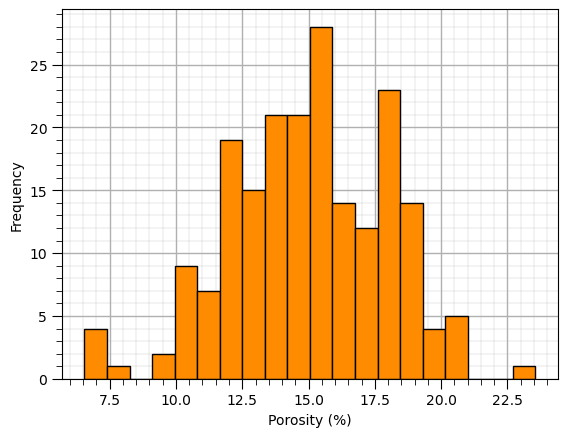

In [200]:
plt.hist(df['Por'],color='darkorange',edgecolor='black',bins=20); plt.xlabel('Porosity (%)'); plt.ylabel('Frequency') # histogram
add_grid(); plt.show()

#### Histogram (normalized)

A histogram with probability on the y axis and the sum of all bars is one, i.e., probability closure.

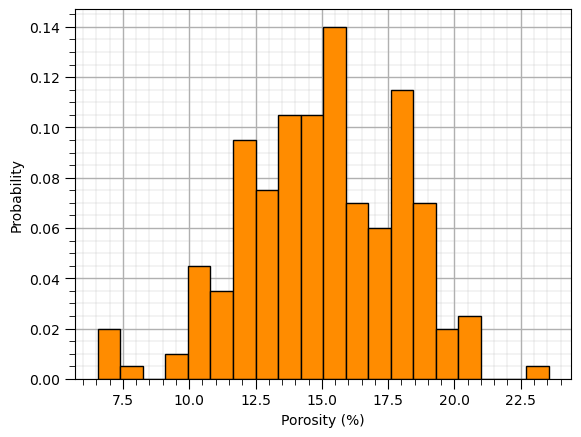

In [203]:
plt.hist(df['Por'],color='darkorange',edgecolor='black',weights = np.ones(len(df))/len(df),bins=20) # normalized histogram
plt.xlabel('Porosity (%)'); plt.ylabel('Probability'); add_grid(); plt.show()

#### Image Plot

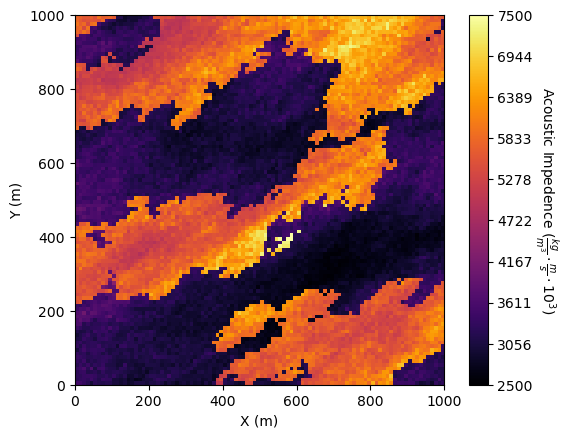

In [206]:
im = plt.imshow(ndarray_2D, origin = 'lower',extent = [0,1000,0,1000],vmin=2500,vmax=7500,cmap = cmap) # plot of 2D ndarray, image or map feature
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(2500, 7500, 10)); plt.xlabel('X (m)'); plt.ylabel('Y (m)')
cbar.set_label(r'Acoustic Impedence ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^3$)', rotation=270, labelpad=20)

#### K-Nearest Neighbours (feature imputation)

Feature imputation by estimating missing features with the nearest neighbours,

* distance is accessed with all samples that have all features present in the sample with a missing feature

* only one pass is applied, there is no iteration

* not as robust as MICE is there is a lot of missing data, it does not learn the structure between the features to fill in missing data

In [209]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")    # instantiate Multiple Imputation by Chained Equations (MICE) imputer
X_imputed = knn_imputer.fit_transform(X_missing)              # train and apply MICE to impute the missing data
X_imputed = pd.DataFrame(X_imputed, columns=X_missing.columns,index=X_missing.index) # make imputed results into a DataFrame with same columns as X
X_imputed.describe()                                          # preview the DataFrame

,Por,LogPerm,AI,Brittle,TOC,VR
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.924820,1.375450,2.982915,49.227565,1.014950,1.997420
std,2.999168,0.367557,0.557240,13.755077,0.480852,0.284183
min,5.400000,0.120000,0.960000,-1.500000,-0.250000,0.900000
25%,12.846250,1.145000,2.590000,40.640000,0.700000,1.830000
50%,15.035000,1.360000,3.010000,49.477500,1.007500,2.000000
75%,17.012500,1.610000,3.330000,58.055000,1.370000,2.165000
max,24.650000,2.580000,4.700000,93.470000,2.710000,2.900000


#### K-Nearest Neighbours (prediction at testing data)

Apply our model to predict at withheld testing data.

In [212]:
n_neighbours = 10; p = 2; weights = 'uniform'                 # KNN model hyperparameters
knn_model = KNeighborsRegressor(weights = weights, n_neighbors=n_neighbours, p = p).fit(X_train,y_train) # instantiate the prediction model
y_test_temp = y_test.copy(deep=True)
y_test_temp['Estimated Prod'] = knn_model.predict(X_test)     # predict over the training data
y_test_temp.head()

,Prod,Estimated Prod
179,656.507448,2303.626455
155,3110.245382,3774.108284
23,2581.359826,2321.644376
159,6498.151446,5713.166746
96,4148.822923,4108.942362


#### K-Nearest Neighbours (prediction at training data)

Apply our model to predict at the retained training data.

In [215]:
n_neighbours = 10; p = 2; weights = 'uniform'                 # KNN model hyperparameters
knn_model = KNeighborsRegressor(weights = weights, n_neighbors=n_neighbours, p = p).fit(X_train,y_train) # instantiate the prediction model
y_train_temp = y_train.copy(deep=True)
y_train_temp['Estimated Prod'] = knn_model.predict(X_train)   # predict over the training data
y_train_temp.head()

,Prod,Estimated Prod
125,3750.106623,3974.087763
68,4644.717576,4226.039680
69,1991.991593,3165.041802
108,6688.360827,6336.236197
131,5076.638358,5332.676914


#### K-Nearest Neighbours (train)

Train model parameters on training data with specified model hyperparameters

* since K-nearest neighbours is a lazy learning model, there are no trained model parameters to display

* instead we look at the cross validation plot

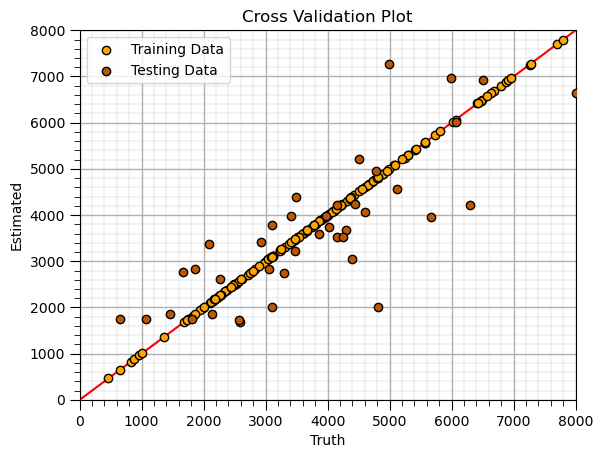

In [218]:
k = 1; p = 2; weights = 'uniform'                             # KNN model hyperparameters
neigh = KNeighborsRegressor(weights = weights, n_neighbors=k, p = p) # instantiate the prediction model
knn_model = neigh.fit(X_train,y_train)                        # train the model with the training data
y_train_hat = knn_model.predict(X_train)                      # predict over the testing cases
y_test_hat = knn_model.predict(X_test)                        # predict over the testing cases
plt.scatter(y_train,y_train_hat,color='orange',edgecolor='black',label=r'Training Data',zorder=10) # scatter plot
plt.scatter(y_test,y_test_hat,color=utcolor,edgecolor='black',label=r'Testing Data',zorder=10) # scatter plot
plt.ylabel('Estimated'); plt.xlabel('Truth'); plt.title('Cross Validation Plot'); plt.legend(loc = 'upper left')
plt.plot([0,8000],[0,8000],color='red'); plt.xlim(0,8000,); plt.ylim(0,8000) 
add_grid()

#### K-Nearest Neighbours (retrain tuned model)

Apply tuned hyperparameters and retrain the model with all the data.

* this is the model that we will use for future predictions, real-world use

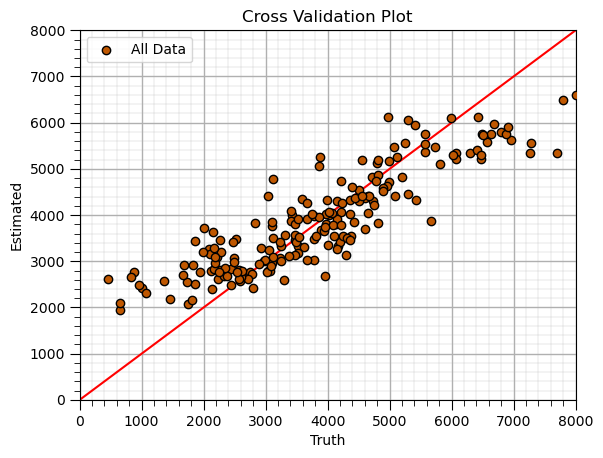

In [221]:
tuned_k = 15; p = 2; weights = 'uniform'                      # KNN model hyperparameters
knn_tuned_model = KNeighborsRegressor(weights = weights, n_neighbors=tuned_k, p = 2).fit(X,y) # retrain the tuned model with all data
y_hat = knn_tuned_model.predict(X)                            # predict over the testing cases
plt.scatter(y,y_hat,color=utcolor,edgecolor='black',label=r'All Data',zorder=10) # scatter plot
plt.ylabel('Estimated'); plt.xlabel('Truth'); plt.title('Cross Validation Plot'); plt.legend(loc = 'upper left')
plt.plot([0,8000],[0,8000],color='red'); plt.xlim(0,8000,); plt.ylim(0,8000); add_grid()

#### K-Nearest Neighbours (tune)

Train model parameters on training data with a range of model hyperparameters, select the model hyperparameters with minimum error over the withheld testing data

This requires the following steps,

Loop over the hyperparameter(s) values,

1. train the model with the retained training data

2. predict at the withheld testing data

3. calculate the testing error

Select the hyperparameter that minimized the testing error

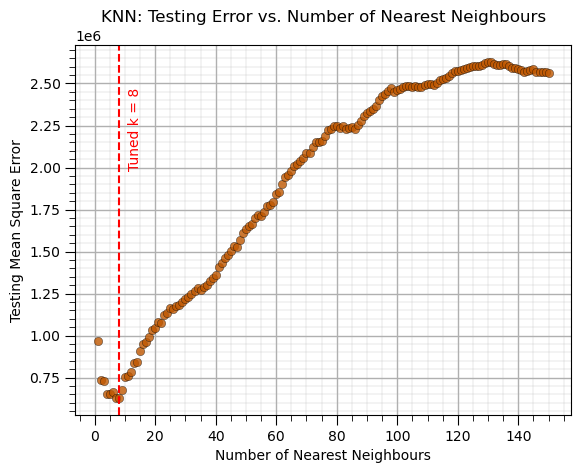

In [224]:
k = 1; weights = 'uniform'                                    # set initial, lowest k hyperparameter
MSE_knn_list = []; k_list = []                                # make lists to store the results
while k <= 150:                                               # loop over the k hyperparameter
    knn_model = KNeighborsRegressor(weights = weights, n_neighbors=k, p = 2).fit(X_train,y_train) # instandiate and train the model
    y_test_hat = knn_model.predict(X_test)                    # predict over the testing cases
    MSE = metrics.mean_squared_error(y_test,y_test_hat)       # calculate the MSE testing
    MSE_knn_list.append(MSE)                                  # add to the list of MSE
    k_list.append(k)                                          # append k to an array for plotting
    k = k + 1

tuned_k = k_list[np.argmin(MSE_knn_list)]                     # get the k that minimizes the testing MSE

plt.subplot(111)                                              # plot the testing error vs. hyperparameter
plt.scatter(k_list,MSE_knn_list,s=None, c=utcolor, alpha=0.8, linewidths=0.3, edgecolors="black") 
plt.axvline(x=tuned_k, color='red', linestyle='--'); plt.annotate('Tuned k = ' + str(tuned_k),[tuned_k+3,2.0e6],color='red',rotation= 90)
plt.title('KNN: Testing Error vs. Number of Nearest Neighbours'); plt.xlabel('Number of Nearest Neighbours'); plt.ylabel('Testing Mean Square Error')
add_grid()

#### Linear Regression Model (model parameters)

Retreive the model parameters.

In [227]:
coef_df = pd.DataFrame({'Feature': ['Intercept'] + list(X.columns),'Coefficient': list(linear_model.intercept_) + list(linear_model.coef_.ravel())})
coef_df

,Feature,Coefficient
0,Intercept,-4053.511325
1,Por,453.607135
2,Perm,24.707076
3,AI,-154.448203
4,Brittle,11.173989
5,TOC,-183.938586
6,VR,580.078458


#### Linear Regression Model (prediction test)

In [230]:
y_test_temp = y_test.copy(deep=True)                          # make a deep copy of the y test DataFrame
y_test_temp['Estimated Prod'] = linear_model.predict(X_test)  # predict over the training data
y_test_temp.head()

,Prod,Estimated Prod
179,656.507448,379.818856
155,3110.245382,2943.388125
23,2581.359826,1372.426014
159,6498.151446,5563.914978
96,4148.822923,4987.375301


#### Linear Regression Model (prediction train)

In [233]:
y_train_temp = y_train.copy(deep=True)                        # make a deep copy of the y train DataFrame
y_train_temp['Estimated Prod'] = linear_model.predict(X_train)# predict over the training data
y_train_temp.head()

,Prod,Estimated Prod
125,3750.106623,3938.246048
68,4644.717576,3824.308392
69,1991.991593,2906.015510
108,6688.360827,6653.961261
131,5076.638358,5048.864286


#### Linear Regression Model (train)

Train model parameters on training data, no hyperparameters

In [236]:
linear_model = LinearRegression().fit(X_train,y_train)        # instantiate and train linear regression model, no hyperparmeters
coef_df = pd.DataFrame({'Feature': ['Intercept'] + list(X.columns),'Coefficient': list(linear_model.intercept_) + list(linear_model.coef_.ravel())})
coef_df

,Feature,Coefficient
0,Intercept,-4053.511325
1,Por,453.607135
2,Perm,24.707076
3,AI,-154.448203
4,Brittle,11.173989
5,TOC,-183.938586
6,VR,580.078458


#### Listwise Deletion

Remove all samples that are missing and features.

* the "sledge hammer" approach to avoid feature imputation

* not recommended, often removes too much data

In [239]:
df_listwise = df_missing.dropna(how='any',inplace=False)      # listwise deletion
df_listwise.describe()

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,485.680952,14.976381,1.407238,2.999857,49.406143,1.005524,2.001524,2373.025529
std,292.292307,3.072786,0.422033,0.584267,14.311860,0.521783,0.306854,1661.542253
min,3.000000,6.480000,0.360000,1.330000,17.200000,-0.230000,0.900000,75.215188
25%,206.250000,12.682500,1.110000,2.612500,39.117500,0.640000,1.800000,1154.774039
50%,477.500000,15.035000,1.415000,3.055000,48.320000,0.980000,2.010000,2029.697410
75%,729.500000,17.085000,1.680000,3.360000,58.547500,1.347500,2.220000,3223.502405
max,1000.000000,24.650000,2.480000,4.500000,86.800000,2.560000,2.820000,12568.644130


#### Mean (imputation)

A very simple approach for feature imputation, replace the missing values with the mean of the feature,

* does on introduce a bias in the mean, but will introduce a bias in the standard deviation and variance

* will likely bias low the between predictor and response feature correlation 

In [242]:
mean_imputer = SimpleImputer(strategy='mean')                 # instantiate mean imputor
X_imputed = mean_imputer.fit_transform(X_missing)             # train and apply MICE to impute the missing data
X_imputed = pd.DataFrame(X_imputed, columns=X_missing.columns,index=X_missing.index) # make imputed results into a DataFrame with same columns as X
X_imputed.describe()                                          # preview the DataFrame

,Por,LogPerm,AI,Brittle,TOC,VR
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.898708,1.383061,2.984200,49.607696,0.999551,1.996173
std,2.933199,0.344835,0.544243,12.532978,0.431517,0.265394
min,5.400000,0.120000,0.960000,-1.500000,-0.250000,0.900000
25%,12.940000,1.217500,2.630000,43.937500,0.800000,1.897500
50%,14.898708,1.383061,2.984200,49.607696,0.999551,1.996173
75%,16.840000,1.530000,3.302500,55.515000,1.210000,2.110000
max,24.650000,2.580000,4.700000,93.470000,2.710000,2.900000


#### Minimum and Maximum (dataframe)

In [245]:
print('Dataframe Minimum:'); print(df.min())                  # using pandas DataFrame's min and max member functions
print('\nDataframe Maximum:'); print(df.max())

Dataframe Minimum:
Well         1.000000
Por          6.550000
Perm         1.130000
AI           1.280000
Brittle     10.940000
TOC         -0.190000
VR           0.930000
Prod       463.579973
dtype: float64

Dataframe Maximum:
Well        200.000000
Por          23.550000
Perm          9.870000
AI            4.630000
Brittle      84.330000
TOC           2.180000
VR            2.870000
Prod       8428.187903
dtype: float64


#### Minimum and Maximum (ndarray)

In [248]:
print('2D ndarray Minimum:'); print(np.min(ndarray_2D))       # using NumPy's min and max functions that flatten internally
print('\n2D ndarray Maximum:'); print(np.max(ndarray_2D))

2D ndarray Minimum:
2524.3764903966144

2D ndarray Maximum:
7852.92310081411


#### Model Plot (linear 1D)

We use the follow steps,

1. make an array of equally spaced values of the predictor feature(s)

2. predict at all of these predictor values

3. cross plot the predictions with the predictor values

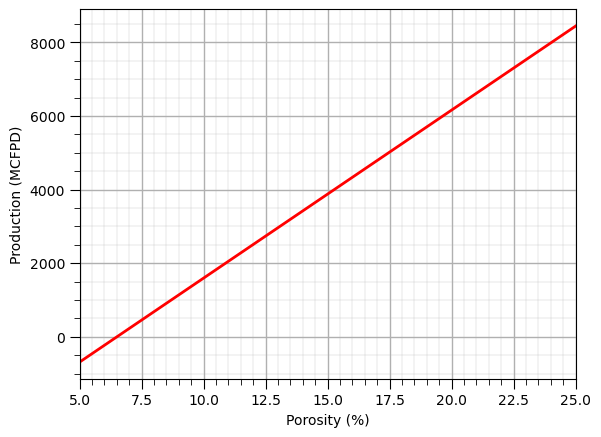

In [251]:
x_values = np.linspace(5,25,100).reshape(-1,1)                # array of equally space values in the predictor feature
y_hat_linear_1pred = linear_1pred_model.predict(x_values)     # predict over the predictor feature values
plt.plot(np.linspace(5,25,100),y_hat_linear_1pred,color='red',lw=2) # plot the predictions vs. the predictor values
plt.xlabel('Porosity (%)'); plt.ylabel('Production (MCFPD)'); add_grid(); plt.xlim(5,25); plt.show()

#### Model Plot (linear 2D)

We use the follow steps,

1. make a mesh array of equally spaced values of the predictor feature(s)

2. predict at all of these predictor values

3. flatten all meshes to 1D

3. plot with a colored scatter plot with square markers (s) scalled to fill in the plot

I prefer this method because plt.imshow often is inconsistent with other plots when added as a subplot

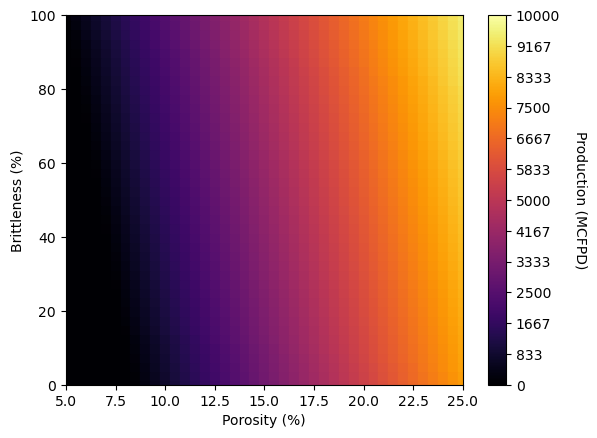

In [254]:
XX1, XX2 = np.meshgrid(np.arange(5,25.5,0.5),np.arange(0,102.5,2.5)) # get a regular grid of response feature values
y_hat = linear_2pred_model.predict(np.c_[XX1.ravel(), XX2.ravel()]).reshape(-1)   # predict over grid and convert to a 1D vector
sc = plt.scatter(XX1.ravel(),XX2.ravel(),c=y_hat,marker='s',s=50,vmin=0,vmax=10000,cmap=cmap) # convert XX1/2 to 1D vectors use for scatter plot
cbar = plt.colorbar(sc, orientation="vertical", ticks=np.linspace(0, 10000, 13)); cbar.set_label(r'Production (MCFPD)', rotation=270, labelpad=20)
plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)'); plt.xlim(5,25); plt.ylim(0,100); plt.show()

#### Model Mean Absolute Error (testing)

In [257]:
MSE_test = metrics.mean_absolute_error(y_test,y_hat_test)     # calculate the training MSE
print('Model Training MAE: ' + str(MSE_test))                 # print the training MSE

Model Training MAE: 660.2808961173391


#### Model Mean Absolute Error (training)

In [260]:
MSE_train = metrics.mean_absolute_error(y_train,y_hat_train)  # calculate the training MSE
print('Model Training MAE: ' + str(MSE_train))                # print the training MSE

Model Training MAE: 713.4026730760603


#### Model MSE (testing)

In [263]:
MSE_test = metrics.mean_squared_error(y_test,y_hat_test)      # calculate the training MSE
print('Model Training MSE: ' + str(MSE_test))                 # print the training MSE

Model Training MSE: 649044.4516069604


#### Model MSE (training)

In [266]:
MSE_train = metrics.mean_squared_error(y_train,y_hat_train)   # calculate the training MSE
print('Model Training MSE: ' + str(MSE_train))                # print the training MSE

Model Training MSE: 805986.6842431576


#### Multiple Imputation by Chained Equations

Feature imputation by iterative application of K-nearest neighbours,

* accomplished by multiple passes, the structure in the data is learned to improve the imputation

* robust with significant porportion of missing feature values

In [269]:
mice_imputer = IterativeImputer(random_state = seed,max_iter=100) # instantiate Multiple Imputation by Chained Equations (MICE) imputer
X_imputed = mice_imputer.fit_transform(X_missing)             # train and apply MICE to impute the missing data
X_imputed = pd.DataFrame(X_imputed, columns=X_missing.columns,index=X_missing.index) # make imputed results into a DataFrame with same columns as X
X_imputed.describe()                                          # preview the DataFrame

,Por,LogPerm,AI,Brittle,TOC,VR
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.944723,1.404668,2.980626,49.817322,1.005436,1.990035
std,3.030406,0.397241,0.565985,14.029791,0.492149,0.302019
min,5.400000,0.120000,0.960000,-5.422936,-0.306453,0.900000
25%,12.850000,1.142772,2.580000,41.384356,0.660000,1.810000
50%,14.950000,1.395805,3.010000,50.077539,1.010000,1.985885
75%,17.052500,1.670000,3.350314,57.951806,1.358028,2.170000
max,24.650000,2.580000,4.700000,100.043660,2.710000,2.927459


#### Mutual Information

Measure of information shared between predictors and the response feature,

* robust in the presence of nonlinearity and heteroscedasticity,

| MI Value Range      | Interpretation                                    |
|---------------------|--------------------------------------------------|
| Close to 0          | Variables are nearly independent                  |
| Low (small positive) | Weak dependency or little shared information      |
| Moderate             | Some meaningful dependency                         |
| High                 | Strong dependency; variables share substantial information |
| Very High            | Near deterministic relationship                    |

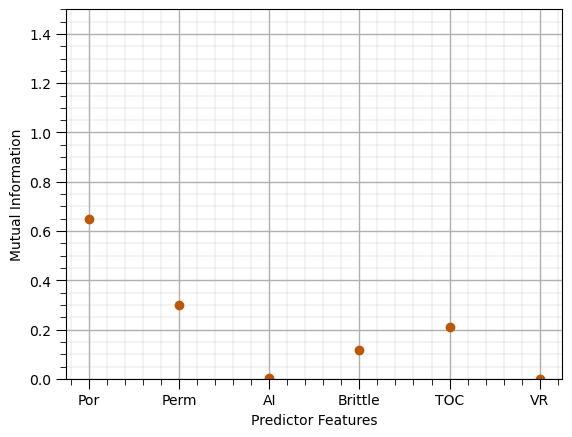

In [272]:
mi = mutual_info_regression(X, y.values.ravel(), random_state=0) # calculuate mutual information
mi_series = pd.Series(mi, index=X.columns)                    # convert ndarray to pandas series (column of a DataFrame) for ease of plotting
mi_series.plot(color=utcolor,style='o'); 
plt.xlabel('Predictor Features'); plt.ylabel('Mutual Information'); plt.ylim(0,1.5); 
add_grid(); plt.show()

#### Mutual Information (normalized)

Measure of information shared between predictors and the response feature,

* robust in the presence of nonlinearity and heteroscedasticity

* normalized by marginal entropies to have a maximum value of 1.0, 0.0 = no information, 1.0 = perfect information

Here's the common rule of thumb to assist with interpretation,

| NMI Value Range | Interpretation                  |
|-----------------|--------------------------------|
| 0.0 – 0.2       | Very weak or negligible relation|
| 0.2 – 0.4       | Weak relation                   |
| 0.4 – 0.6       | Moderate relation               |
| 0.6 – 0.8       | Strong relation                 |
| 0.8 – 1.0       | Very strong or near perfect     |

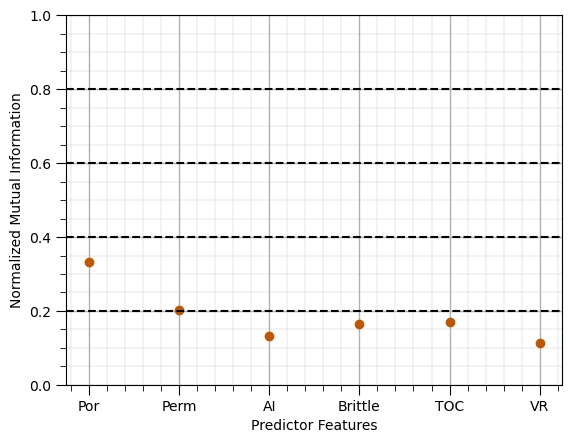

In [275]:
kbd = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile') # instantiate dicretizer
X_binned = pd.DataFrame(kbd.fit_transform(X), columns=X.columns) # discretize the predictor features
y_bins = pd.qcut(y.values.ravel(), q=10, labels=False, duplicates='drop') # discretize the response features
nmi_scores = []
for col in X_binned.columns:                                  # loop over predictor features 
    nmi = normalized_mutual_info_score(X_binned[col], y_bins) # calculate normalize mutual information
    nmi_scores.append(nmi)
nmi_series = pd.Series(nmi_scores, index=X.columns)
nmi_series.plot(color=utcolor,style='o'); plt.xlabel('Predictor Features'); plt.ylabel('Normalized Mutual Information'); plt.ylim(0,1)
for yvalue in np.arange(0.2,1.0,0.2):
    plt.axhline(y=yvalue, color='black', linestyle='--')      # add interpretation lines
add_grid(); plt.show()

#### Normalize Predictor Features

Normalize the predictor features to remove any sensitivity to feature range or variance, for example,

* put features all on equal playing field for distance calculations

Min / max normalization forces the minimum to be 0.0 and the maximum to be 1.0

In [278]:
normalizer = MinMaxScaler()                                   # instantiate min / max normalizer 
norm_array = normalizer.fit_transform(X)                      # normalize the predictor features                 
X_norm = pd.DataFrame(norm_array, columns=X.columns)          # convert output to a DataFrame
X_norm.describe()                                             # preview the DataFrame

,Por,Perm,AI,Brittle,TOC,VR
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.496538,0.366219,0.504134,0.507180,0.498080,0.533144
std,0.174775,0.198057,0.169220,0.192526,0.203202,0.155066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374265,0.227975,0.378358,0.365377,0.340717,0.432990
50%,0.501176,0.332380,0.500000,0.525548,0.514768,0.530928
75%,0.638382,0.475686,0.616418,0.644809,0.649789,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Scatter Plot

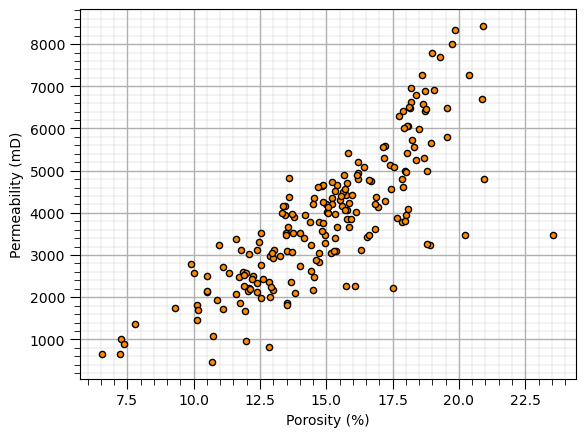

In [281]:
plt.scatter(X['Por'],y['Prod'],color='darkorange',edgecolor='black',s=20); plt.xlabel('Porosity (%)'); plt.ylabel('Permeability (mD)')
add_grid(); plt.show(); 

#### Standardize Predictor Features

Standardize the predictor features to remove any sensitivity to feature range or variance, for example,

* put features all on equal playing field for distance calculations

Standardization forces the mean to be 0.0 and the standard deviation to be 1.0

In [284]:
scaler = StandardScaler()                                     # instantiate standardizer 
standard_array = scaler.fit_transform(X)                      # standardize the predictor features    
X_stand = pd.DataFrame(standard_array, columns=X.columns)     # convert output to a DataFrame
X_stand.describe()                                            # preview the DataFrame

,Por,Perm,AI,Brittle,TOC,VR
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,2.486900e-16,-6.217249e-17,4.130030e-16,2.042810e-16,3.375078e-16,9.081624e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-2.848142e+00,-1.853701e+00,-2.986650e+00,-2.640962e+00,-2.457313e+00,-3.446814e+00
25%,-7.013606e-01,-6.997528e-01,-7.451372e-01,-7.383912e-01,-7.763606e-01,-6.475066e-01
50%,2.660490e-02,-1.712823e-01,-2.449306e-02,9.564649e-02,8.233024e-02,-1.432979e-02
75%,8.136175e-01,5.540977e-01,6.652032e-01,7.166516e-01,7.484661e-01,5.938532e-01
max,2.887855e+00,3.208033e+00,2.937664e+00,2.566186e+00,2.476256e+00,3.018254e+00


#### Summary Statistics (DataFrame)

In [287]:
df.describe()                                                 # calculate the summary statistics of each feature

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,3874.056957
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,1615.551334
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,463.579973
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,2616.522434
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,3801.156899
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,4786.375831
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,8428.187903


#### Train and Test Split

Random splitting of the data into train and test splits.

In [290]:
test_proportion = 0.2                                         # set the proportion of withheld testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_proportion, random_state=seed) # train and test split

#### Variance Inflation Factor

Feature ranking method that only considers the linear redundancy between the predictor features,

* relationship with the response feature, relevancy is not considered

* general used as a screening method to remove features before more comprehensive feature ranking

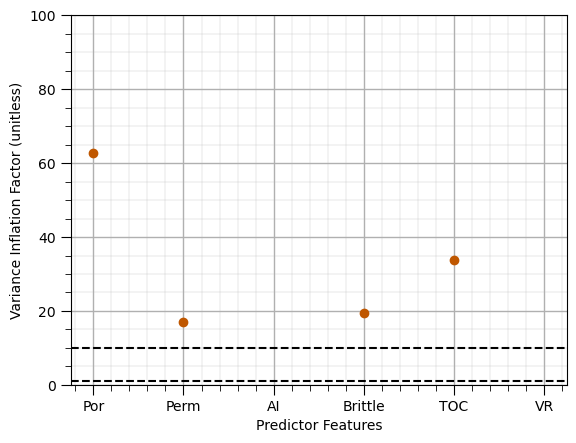

In [293]:
vif_data = pd.Series(                                         # loop over predictor features and store result in pandas series for ease of plotting
    [variance_inflation_factor(X.values, i) for i in range(X.values.shape[1])],
    index=X.columns)
vif_data.plot(color=utcolor,style='o'); plt.xlabel('Predictor Features'); plt.ylabel('Variance Inflation Factor (unitless)'); plt.ylim(0,100)
plt.axhline(y=1, color='black', linestyle='--'); plt.axhline(y=10, color='black', linestyle='--');
add_grid(); plt.show()

#### Comments

These are some basic code snipets for predictive machine learning in Python. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)